## Predict Complaint Types

Can a predictive model be built for a future prediction of the possibility of complaints of the type that you have identified in response to question 1?

In [5]:
import numpy as np
import pandas as pd 

## 1. Read Datasets
      1. Read Complaints dataset 
      2. Filter out complaint dataset to specific complaint (HEAT/HOT WATER)
      3. Read Broonx(Pluto) dataset
      4. Filterout relevant columns 
      

### 1.1 Read Complaints dataset 

In [6]:
url="https://data.cityofnewyork.us/resource/erm2-nwe9.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status"
df_raw = pd.read_csv(url, parse_dates=True)
df_raw.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-12-06T06:17:35.000,45098297,UNSANITARY CONDITION,11207.0,510 RIVERDALE AVENUE,RIVERDALE AVENUE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.662633,-73.897584,NaN,RESIDENTIAL BUILDING,Open
1,2019-12-06T03:21:57.000,45098170,PAINT/PLASTER,10467.0,3857 WHITE PLAINS ROAD,WHITE PLAINS ROAD,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.885136,-73.861955,NaN,RESIDENTIAL BUILDING,Open
2,2019-12-06T08:34:41.000,45098092,HEAT/HOT WATER,10031.0,3351 BROADWAY,BROADWAY,ADDRESS,NEW YORK,The Department of Housing Preservation and Dev...,MANHATTAN,40.820463,-73.954820,2019-12-06T08:54:07.000,RESIDENTIAL BUILDING,Closed
3,2019-12-06T07:22:19.000,45097989,GENERAL,11216.0,586 LINCOLN PLACE,LINCOLN PLACE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.671418,-73.957127,NaN,RESIDENTIAL BUILDING,Open
4,2019-12-06T03:09:33.000,45097981,HEAT/HOT WATER,10467.0,3857 WHITE PLAINS ROAD,WHITE PLAINS ROAD,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.885136,-73.861955,2019-12-07T18:42:35.000,RESIDENTIAL BUILDING,Closed


###     1.2 Filter out complaint dataset to specific complaint and borough

In [7]:
df_heat  = df_raw[(df_raw['borough'] == 'BRONX') & (df_raw['complaint_type'] == 'HEAT/HOT WATER')]
df_heat.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
4,2019-12-06T03:09:33.000,45097981,HEAT/HOT WATER,10467.0,3857 WHITE PLAINS ROAD,WHITE PLAINS ROAD,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.885136,-73.861955,2019-12-07T18:42:35.000,RESIDENTIAL BUILDING,Closed
12,2019-12-06T07:53:41.000,45096211,HEAT/HOT WATER,10456.0,256 EAST 166 STREET,EAST 166 STREET,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.830670,-73.916123,2019-12-07T17:50:14.000,RESIDENTIAL BUILDING,Closed
37,2019-12-05T14:03:00.000,45094945,HEAT/HOT WATER,10455.0,729 UNION AVENUE,UNION AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.817256,-73.903715,2019-12-08T02:08:36.000,RESIDENTIAL BUILDING,Closed
40,2019-12-05T20:47:13.000,45094857,HEAT/HOT WATER,10472.0,1403 ROSEDALE AVENUE,ROSEDALE AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.834937,-73.869966,2019-12-07T18:31:17.000,RESIDENTIAL BUILDING,Closed
93,2019-12-05T10:07:47.000,45092709,HEAT/HOT WATER,10460.0,1892 DALY AVENUE,DALY AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.840277,-73.884813,2019-12-06T15:50:27.000,RESIDENTIAL BUILDING,Closed


###   1.3 Read Bronx (Pluto) dataset


In [8]:
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_cred = ibm_boto3.client(service_name='< **replace with your ibm service id**>',
    ibm_api_key_id ='< **replace with your ibm api key id**>',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_cred.get_object(Bucket='< **replace with your ibm bucket id**>',Key='BX_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
bronx = pd.read_csv(body)
bronx.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,BX,2260,1,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
1,BX,2260,4,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
2,BX,2260,10,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
3,BX,2260,17,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
4,BX,2260,18,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1


### 1.4 Filterout relevant fields from Bronx dataset

In [9]:
columns =["Address", "BldgArea", "BldgDepth", "BuiltFAR", "CommFAR", "FacilFAR", 
          "Lot", "LotArea", "LotDepth", "NumBldgs",
          "NumFloors", "OfficeArea", "ResArea", "ResidFAR", 
          "RetailArea", "YearBuilt", "YearAlter1", "ZipCode", "YCoord",  "XCoord"]
bronx =bronx[columns] 
bronx.head()

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
0,122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,0.0,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0
1,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,1.0,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0
2,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,2.0,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0
3,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,5.0,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0
4,148 BRUCKNER BOULEVARD,8595,70.0,4.58,5.0,6.5,18,1875,75.0,1,5.0,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0


## 2. Prepare Dataset
        1. Merge both dataset on address field
        2. Convert status variable into categorical 
        3. Drop unnecessory features
        4. Break into X and Y
       

### 2.1 Merge both dataset on address field

Merge both dataset we use left join so we can use those buildings also which does not complaint yet

In [10]:
df_address = df_heat[["incident_address","status"]]
df_merge = bronx.merge(df_address, 
               left_on='Address', right_on='incident_address' ,how='left')
df_merge.head()

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,...,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,incident_address,status
0,122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,...,0,6.02,0,0,0,10454.0,232162.0,1005957.0,NaN,NaN
1,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,...,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0,NaN,NaN
2,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,...,0,6.02,0,1931,0,10454.0,232036.0,1006187.0,NaN,NaN
3,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,...,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0,144 BRUCKNER BOULEVARD,Closed
4,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,...,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0,144 BRUCKNER BOULEVARD,Closed


###  2.2 Convert status variable into categorical 

Here we change the Closed and Open satus to 1 and if no complain then convert it to 0 to classify 


In [11]:
dict1 = {'Closed': 1 ,'Open':1 }
df_merge['status']=df_merge['status'].map(dict1) 
df_merge['status'] = df_merge['status'].fillna(0)

In [12]:
df_merge['status'].unique() 

array([0., 1.])

### 2.3 Drop unnecessary features

This is based on results obtained from question 3.

In [13]:
# drop columns which did not give any information from question 3
drop_column = ["ZipCode" ,"CommFAR" ,"status" , "incident_address","Address" ,"NumBldgs"]
y = df_merge["status"]      
x = df_merge.drop(drop_column,axis = 1 )

###  2.4 Break into X and Y

since we need to train a model

In [14]:
y = df_merge["status"]      
x = df_merge.drop(drop_column,axis = 1 )
x= x.fillna(0)

## 3. Split Train and Test Data

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score,recall_score
from xgboost import XGBClassifier
 
#Split train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## 4. Train the model Using Xgboost classifier

In [16]:
#instantiate model and train
XGB = XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5)
XGB.fit(x_train, y_train)

#make predictions for test set
y_pred = XGB.predict(x_test)
predictions = [round(value) for value in y_pred]

#check accuracy score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.23%


In [26]:
#confusion matrix
cma = confusion_matrix(y_test,predictions)
cma

array([[20100,  2753],
       [ 3734, 85773]])

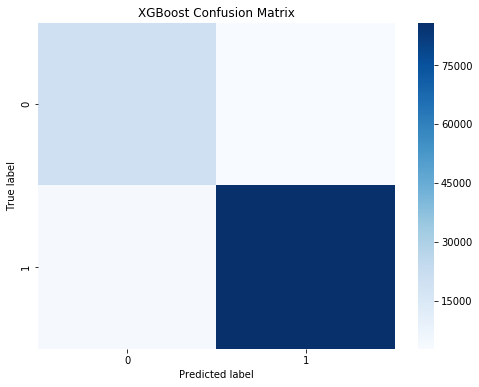

In [35]:
#Visualize confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cma, cmap=plt.cm.Blues)
plt.title('XGBoost Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## 5. Using Random Forest Classifier


In [18]:
#instantiate random forest model 
rclf = RandomForestClassifier()

In [19]:
#train the model
rclf.fit(x_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
#Predict 
y_pred = rclf.predict(x_test)

#check accuracy score 
acc = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (acc * 100.0))

#check recall score
recall = recall_score(y_test,y_pred)
print("Recall: %.2f%%" % (recall * 100.0))

#print confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

Accuracy: 97.70%
Recall: 98.58%


array([[21538,  1315],
       [ 1269, 88238]])

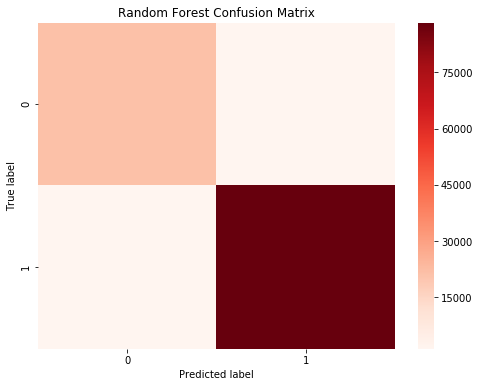

In [36]:
#Visualize confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap=plt.cm.Reds)
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## 6. Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

#instantiate logistic regression model
log= LogisticRegression()

#train the model
log.fit(x_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
#Predict 
y_prediction = log.predict(x_test)

#check accuracy score 
accura = accuracy_score(y_test, y_prediction)
print("Accuracy: %.2f%%" % (accura * 100.0))

#check recall score
reca = recall_score(y_test,y_prediction)
print("Recall: %.2f%%" % (reca * 100.0))

#print confusion matrix
cmx = confusion_matrix(y_test,y_prediction)
cmx

Accuracy: 90.49%
Recall: 89.80%


array([[21292,  1561],
       [ 9126, 80381]])

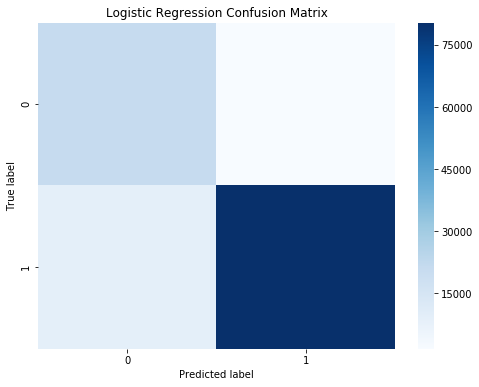

In [37]:
#Visualize Logistic model confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cmx, cmap=plt.cm.Blues)
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Conclusion

To conclude, we have explore three different models. All of them provided us a good accuracy score.
However, the Random Forest model performed better than XGBoost and Logistic Regression.
The prediction accuracy for random forest model is of 97.70% as opposed to Logistic regression with 90.49% accuracy.

With these models, we are able to predict future HEAT/HOT WATER complaints with confidence.

#### Future Work
A time series analysis or forecast model could have been used as well to predict the number of calls that could be received.